# ASSIGNMENT - BY YASSIN MY

In [245]:
import pandas as pd
import numpy as np

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

sns.set()

In [247]:
telco_churn = pd.read_csv(r'C:\Users\Yassin\Desktop\test\Pandas-Exercises-master\Telco-Customer-Churn.csv')

In [248]:
telco_churn.head() #always show first 5 as set as default

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Info about the dataset?

In [249]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [250]:
telco_churn.shape #total columns and rows

(7043, 21)

#### What is the name of 20th column?¶

In [251]:
telco_churn.columns[19]

'TotalCharges'

#### How is the dataset indexed?

In [252]:
telco_churn.index

RangeIndex(start=0, stop=7043, step=1)

#### Count female and male customer

In [253]:
pd.crosstab(index=telco_churn["gender"],columns="Count") # count male and female customer
                      

col_0,Count
gender,
Female,3488
Male,3555


### RELATIONSHIP BETWEEN SENIOR CITIZEN AND CHURN STATUS ###

#### Count senior citizen who being the customer for the telco company

In [254]:
telco_churn.groupby('SeniorCitizen').size()   # count no of senior citizen customer

SeniorCitizen
0    5901
1    1142
dtype: int64

In [255]:
IDSeniorCitizen = telco_churn[['customerID', 'SeniorCitizen', 'Churn']] # show per ID
IDSeniorCitizen

,customerID,SeniorCitizen,Churn
0,7590-VHVEG,0,No
1,5575-GNVDE,0,No
2,3668-QPYBK,0,Yes
3,7795-CFOCW,0,No
4,9237-HQITU,0,Yes
5,9305-CDSKC,0,Yes
6,1452-KIOVK,0,No
7,6713-OKOMC,0,No
8,7892-POOKP,0,Yes
9,6388-TABGU,0,No


In [256]:
IDSeniorCitizen.groupby(['Churn', 'SeniorCitizen']).size()

Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
dtype: int64

        #### Based on the figure above, 476 senior citizen has churned whereas the other 666 has retained the services.

In [257]:
PerChurnSrCitizen = IDSeniorCitizen.groupby(['Churn','SeniorCitizen']).Churn.count()
PerChurnSrCitizen_per_ps = IDSeniorCitizen.groupby(['SeniorCitizen']).SeniorCitizen.count()

PerChurnSrCitizen/PerChurnSrCitizen_per_ps*100

Churn  SeniorCitizen
No     0                76.393832
       1                58.318739
Yes    0                23.606168
       1                41.681261
dtype: float64

        #### The percentage obtained above shows 41.68% senior citizen has churned whereas the other 58.32% has retained the services.

In [258]:
telco_churn.groupby('Contract').size()

Contract
Month-to-month    3875
One year          1473
Two year          1695
dtype: int64

       #### Based on the figure above, month-to-month description has the highest customers, followed by two years, and one year packages.

#### Visualizing the obtained finding

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A4D7A20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001B223240>], dtype=object)

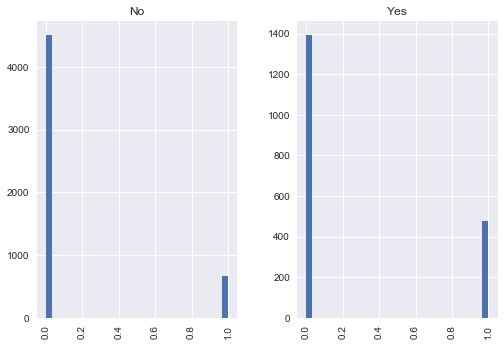

In [259]:
telco_churn.hist(column="SeniorCitizen",by="Churn",bins=30)

### RELATIONSHIP BETWEEN PACKAGE SUBSCRIPTION AND CHURN STATUS

In [260]:
telco_churn.groupby('Contract').size()

Contract
Month-to-month    3875
One year          1473
Two year          1695
dtype: int64

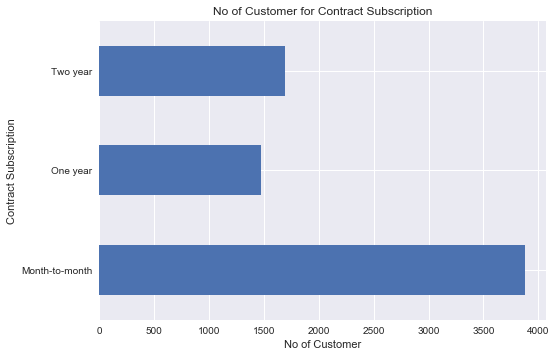

In [261]:
telco_churn['Contract'].unique()
contract_group = telco_churn.groupby('Contract').apply(lambda x: len(x))
contract_group

contract_group.plot(kind='barh', grid=True)
plt.ylabel('Contract Subscription')
plt.xlabel('No of Customer')
plt.title('No of Customer for Contract Subscription')

        #### Month-to-month subscription shows the highest customers subscribed.

In [262]:
telco_churn.groupby(['Churn', 'Contract']).size()

Churn  Contract      
No     Month-to-month    2220
       One year          1307
       Two year          1647
Yes    Month-to-month    1655
       One year           166
       Two year            48
dtype: int64

        #### Out of 3875 customers who subscribed month-to-month package, 1655 has churned from the telco company.

### Visualization of the obtained data above. 

In [263]:

def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 

In [264]:
print 'Before Nominalize:' 
print pd.value_counts(telco_churn["Contract"])
telco_churn["Contract_Nominal"] = coding(telco_churn["Contract"], {'Month-to-month':0,'One year':1,'Two year':2}) #replace churn value Yes=1 and No=0:
print '\nAfter Nominalize:'
print pd.value_counts(telco_churn["Contract_Nominal"])

Before Nominalize:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

After Nominalize:
0    3875
2    1695
1    1473
Name: Contract_Nominal, dtype: int64


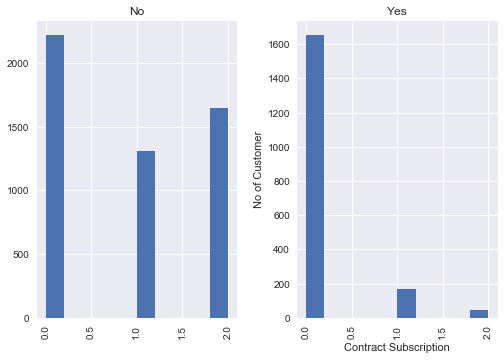

In [265]:
telco_churn.hist(column="Contract_Nominal", by="Churn")
plt.xlabel('Contract Subscription')
plt.ylabel('No of Customer')

### RELATIONSHIP BETWEEN NO OF SENIOR CITIZEN, PACKAGE SUBSCRIPTION AND CHURN STATUS

In [266]:
telco_churn.groupby(['SeniorCitizen', 'Contract']).size()

SeniorCitizen  Contract      
0              Month-to-month    3068
               One year          1283
               Two year          1550
1              Month-to-month     807
               One year           190
               Two year           145
dtype: int64

        #### Out of 3875 customers who subscribed month-to-month package, 807 are senior citizens. The data illustrated in hist below.

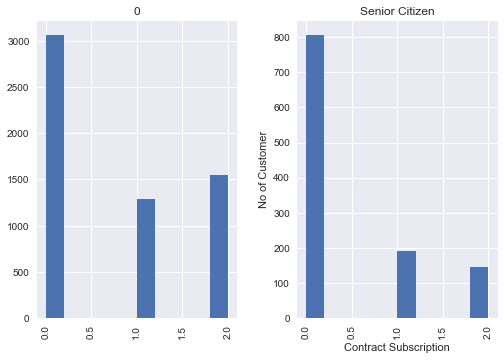

In [267]:
telco_churn.hist(column="Contract_Nominal", by="SeniorCitizen")
plt.xlabel('Contract Subscription')
plt.ylabel('No of Customer')
plt.title('Senior Citizen')

In [268]:
telco_churn.groupby(['SeniorCitizen', 'Contract','Churn' ]).size()

SeniorCitizen  Contract        Churn
0              Month-to-month  No       1854
                               Yes      1214
               One year        No       1146
                               Yes       137
               Two year        No       1508
                               Yes        42
1              Month-to-month  No        366
                               Yes       441
               One year        No        161
                               Yes        29
               Two year        No        139
                               Yes         6
dtype: int64

        #### From the data above, 441 senior citizens who subscribed the month-to-month package has churned.

### What is the relationship between these 3 attributes?

In [269]:
PerChurnSrCitizen_per_package = telco_churn.groupby(['SeniorCitizen','Contract','Churn']).SeniorCitizen.count()
PerChurnSrCitizen_per_ps2 = telco_churn.groupby(['SeniorCitizen']).SeniorCitizen.count()

Data = PerChurnSrCitizen_per_package/PerChurnSrCitizen_per_ps*100
Data


SeniorCitizen  Contract        Churn
0              Month-to-month  No       31.418404
                               Yes      20.572784
               One year        No       19.420437
                               Yes       2.321640
               Two year        No       25.554991
                               Yes       0.711744
1              Month-to-month  No       32.049037
                               Yes      38.616462
               One year        No       14.098074
                               Yes       2.539405
               Two year        No       12.171629
                               Yes       0.525394
Name: SeniorCitizen, dtype: float64

    #### Above percentage shows that 38.62% of senior citizen who subscribed the month-to-month pacakge has churned which indicates the highest population among the senior citizens. It can be shown in diagram below.

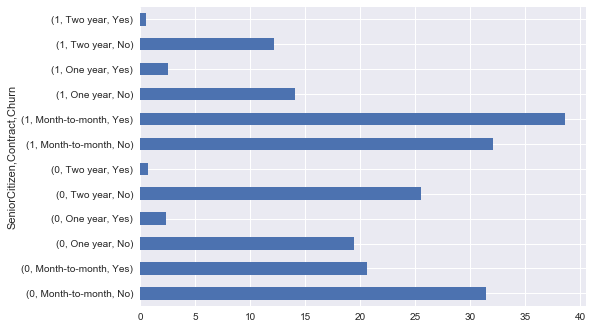

In [270]:
Data.plot(kind='barh', grid=True)

## LINEAR REGRESSION ##

In [271]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

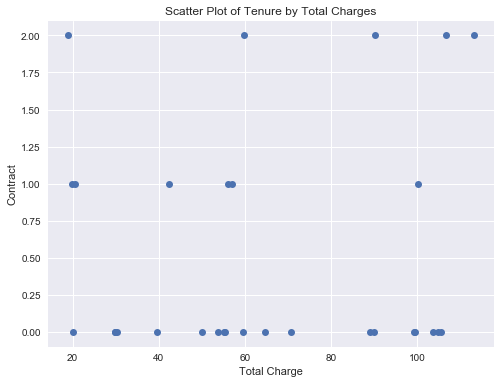

In [285]:
X = telco_churn.MonthlyCharges[0:30]
Y = telco_churn.Contract_Nominal[0:30] # plot loike hahaha!!
plt.ylabel('Contract')
plt.xlabel('Total Charge')
plt.title('Scatter Plot of Tenure by Total Charges')
plt.plot(X, Y, 'o');

        #### Linear regression is not suitable for this project since attributes chosed are suit.

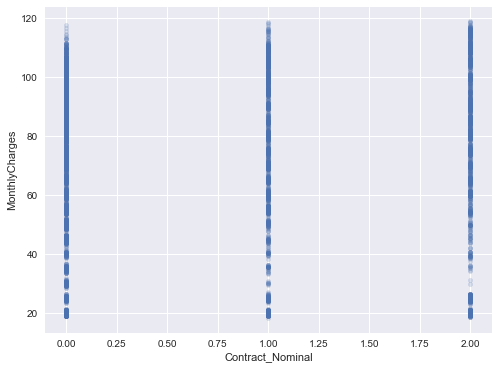

In [303]:
# Pandas scatter plot
telco_churn.plot(kind='scatter', x='Contract_Nominal', y='MonthlyCharges', alpha=0.2)

    ### Based on the graph plotted above, Linear Regression model is not suitable to analyze the chosen attributes.

## Spliting data into test and train data set

In [273]:
X = telco_churn.ix[:, telco_churn.columns != 'Churn']
Y = telco_churn['Churn']

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)

In [274]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 2200 to 3065
Data columns (total 21 columns):
customerID          1409 non-null object
gender              1409 non-null object
SeniorCitizen       1409 non-null int64
Partner             1409 non-null object
Dependents          1409 non-null object
tenure              1409 non-null int64
PhoneService        1409 non-null object
MultipleLines       1409 non-null object
InternetService     1409 non-null object
OnlineSecurity      1409 non-null object
OnlineBackup        1409 non-null object
DeviceProtection    1409 non-null object
TechSupport         1409 non-null object
StreamingTV         1409 non-null object
StreamingMovies     1409 non-null object
Contract            1409 non-null object
PaperlessBilling    1409 non-null object
PaymentMethod       1409 non-null object
MonthlyCharges      1409 non-null float64
TotalCharges        1409 non-null object
Contract_Nominal    1409 non-null int64
dtypes: float64(1), int64(3), o

### Appendix

#### Nominalize the value of Churn as Yes = 1, and No = 0

In [275]:

def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 

print 'Before Nominalize:' 
print pd.value_counts(telco_churn["Churn"])
telco_churn["Churn_Nominal"] = coding(telco_churn["Churn"], {'No':0,'Yes':1}) #replace churn value Yes=1 and No=0:
print '\nAfter Nominalize:'
print pd.value_counts(telco_churn["Churn_Nominal"])

Before Nominalize:
No     5174
Yes    1869
Name: Churn, dtype: int64

After Nominalize:
0    5174
1    1869
Name: Churn_Nominal, dtype: int64
